In [1]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,MotionClouds 

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

numpy       : 1.26.4
MotionClouds: 20220927

Compiler    : Clang 16.0.0 (clang-1600.0.26.3)
OS          : Darwin
Release     : 24.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit

Hostname: obiwan.local



# pilot: one B_sf some B_theta many thetas

In [2]:
# %rm -fr img_pilot

In [3]:
import os
import pandas as pd
import numpy as np

data_folder = 'img_pilot'

if not(os.path.isfile(f'{data_folder}/parameters.json')):
    os.makedirs(data_folder, exist_ok=True)

    print('\n Initializing')

    # parameters 
    import MotionClouds as mc

    N_B_theta = 9
    N_B_sf = 1
    N_repet = 2
    N_thetas = 12

    B_thetas = np.pi/3 * np.linspace(0, 1, N_B_theta+1)[1:]
    print('B_thetas = ', B_thetas)
    B_sfs = [mc.B_sf] #* np.logspace(-1, -1, N_B_sf, base=2)
    print('B_sfs = ', B_sfs)
    theta_max = np.pi/8
    thetas = np.linspace(-theta_max, theta_max, N_thetas)

    parameters = pd.DataFrame(columns=['i_trial', 'theta', 'B_theta', 'B_sf', 'seed', 'fname'])
    # generate all clouds
    import imageio
    def generate_random_cloud(i_trial, theta, B_theta, B_sf, seed, downscale = 1):
        # fname = f'{data_folder}/theta_{theta}_B_theta_{B_theta}_B_sf_{B_sf}_seed_{seed}.png'
        fname = f'{data_folder}/{i_trial}.png'
        if not os.path.isfile(fname):
            fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)
            mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_sf=B_sf,
                                    B_V=0, theta=np.pi/2-theta, B_theta=B_theta)
            im = mc.random_cloud(mc_i, seed=seed)
            im = (mc.rectif(im) * 255).astype('uint8')
            imageio.imwrite(fname, im[:, :, 0])
        return fname


    all_conditions = [(i_repet, i_theta, i_B_theta, i_B_sf) 
                    for i_repet in range(N_repet) 
                    for i_theta in range(N_thetas) 
                    for i_B_theta in range(N_B_theta) 
                    for i_B_sf in range(N_B_sf)]
    N_total_trials = len(all_conditions)
    ind = np.random.permutation(N_total_trials)

    seed = 2024
    np.random.seed(seed)
    # parameters = []
    for i_trial in range(N_total_trials):
        i_repet, i_theta, i_B_theta, i_B_sf = all_conditions[ind[i_trial]]

        fname = generate_random_cloud(i_trial, thetas[i_theta], 
                                B_theta=B_thetas[i_B_theta], 
                                B_sf=B_sfs[i_B_sf], 
                                seed=seed+i_trial)
        # parameters.append({'fname':fname, 'theta': thetas[i_theta], 'B_theta': B_thetas[i_B_theta], 'B_sf': B_sfs[i_B_sf], 'seed': seed+i_trial, 'i_trial': i_trial})
        parameters.loc[i_trial] = [i_trial, thetas[i_theta], B_thetas[i_B_theta], B_sfs[i_B_sf], seed+i_trial, fname]
        print(f"          {{stimulus: '{fname}'}},",

    )

    parameters.to_json(f'{data_folder}/parameters.json')
    # import json
    # with open(f'{data_folder}/parameters.json', 'w') as f:
    #     json.dump(parameters, f)
else:
    parameters = pd.read_json(f'{data_folder}/parameters.json')
parameters


,fname,theta,B_theta,B_sf,seed,i_trial
0,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...
211,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [4]:
# parameters.to_json(f'{data_folder}/parameters.json')
# parameters = pd.read_json(f'{data_folder}/parameters.json')
# parameters


In [5]:
# %rm -fr img_pilot

#   analysing data

In [6]:
# %pip install osfclient

In [7]:
import glob


In [8]:
# import osfclient
# osfclient.cli.init?

Collect file names:

In [9]:

filenames = []

for fname in glob.glob('osfstorage-archive/*json'):
    filenames.append(fname)

## time elapsed per session

In [12]:
for fname in filenames:
    df = pd.read_json(fname)
    print(f'{fname}: total seconds elapsed {np.array(df[df['trial_type']=='image-swipe-response']['time_elapsed'])[-1]/1000:.0f}')
    # print(df)

osfstorage-archive/pilot-w87npww874-data.json: total seconds elapsed 281
osfstorage-archive/pilot-64dtdq27os-data.json: total seconds elapsed 236
osfstorage-archive/pilot-w2oz9j2a3v-data.json: total seconds elapsed 181
osfstorage-archive/pilot-fbskhswn2h-data.json: total seconds elapsed 8
osfstorage-archive/pilot-ybaxemnk16-data.json: total seconds elapsed 423
osfstorage-archive/pilot-6l605rv4nn-data.json: total seconds elapsed 240
osfstorage-archive/pilot-fleb1b7w6x-data.json: total seconds elapsed 10
osfstorage-archive/pilot-t7vs2ac7eg-data.json: total seconds elapsed 374
osfstorage-archive/pilot-64jgewoyyw-data.json: total seconds elapsed 290
osfstorage-archive/pilot-39dqyx1uj0-data.json: total seconds elapsed 214
osfstorage-archive/pilot-wtlob6kr2e-data.json: total seconds elapsed 270
osfstorage-archive/pilot-w18ho6kpvx-data.json: total seconds elapsed 213
osfstorage-archive/pilot-bxne598kx7-data.json: total seconds elapsed 285
osfstorage-archive/pilot-6u3sonqvcr-data.json: total s

Remove such that are obviously cancelled sessions:

In [13]:
filenames_long = []

for fname in filenames:
    df = pd.read_json(fname)
    if np.array(df[df['trial_type']=='image-swipe-response']['time_elapsed'])[-1]/1000 > 50:
        filenames_long.append(fname)
filenames_long

['osfstorage-archive/pilot-w87npww874-data.json',
 'osfstorage-archive/pilot-64dtdq27os-data.json',
 'osfstorage-archive/pilot-w2oz9j2a3v-data.json',
 'osfstorage-archive/pilot-ybaxemnk16-data.json',
 'osfstorage-archive/pilot-6l605rv4nn-data.json',
 'osfstorage-archive/pilot-t7vs2ac7eg-data.json',
 'osfstorage-archive/pilot-64jgewoyyw-data.json',
 'osfstorage-archive/pilot-39dqyx1uj0-data.json',
 'osfstorage-archive/pilot-wtlob6kr2e-data.json',
 'osfstorage-archive/pilot-w18ho6kpvx-data.json',
 'osfstorage-archive/pilot-bxne598kx7-data.json',
 'osfstorage-archive/pilot-vc66p7ozf6-data.json',
 'osfstorage-archive/pilot-btnuh2haf5-data.json',
 'osfstorage-archive/pilot-84mtaqs5h7-data.json',
 'osfstorage-archive/pilot-b2lq0lemc8-data.json',
 'osfstorage-archive/pilot-93ztzrwh11-data.json',
 'osfstorage-archive/pilot-lxlyu1p2tq-data.json',
 'osfstorage-archive/pilot-65r2m7grng-data.json',
 'osfstorage-archive/pilot-z8n2r64662-data.json',
 'osfstorage-archive/pilot-ck6rohvg0h-data.json']

In [14]:
print('Number of valid sessions:', len(filenames_long), ', Average time', np.mean([np.array(pd.read_json(fname)[pd.read_json(fname)['trial_type']=='image-swipe-response']['time_elapsed'])[-1]/1000 for fname in filenames_long]))

Number of valid sessions: 20 , Average time 271.33795000000003


## accuracy per session

In [29]:
# df = df.iloc[1:]
# df = df.reset_index(drop=True)
df

,success,timeout,failed_images,failed_audio,failed_video,trial_type,trial_index,time_elapsed,internal_node_id,rt,stimulus,keyboard_response,swipe_response,response_source
0,1.0,0.0,[],[],[],preload,0,172,0.0-0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,image-swipe-response,1,1335,0.0-1.0-0.0,908.0,img_pilot/0.png,arrowright,NaN,keyboard
2,NaN,NaN,NaN,NaN,NaN,image-swipe-response,2,2037,0.0-1.0-1.0,445.0,img_pilot/1.png,arrowleft,NaN,keyboard
3,NaN,NaN,NaN,NaN,NaN,image-swipe-response,3,2779,0.0-1.0-2.0,484.0,img_pilot/2.png,arrowright,NaN,keyboard
4,NaN,NaN,NaN,NaN,NaN,image-swipe-response,4,3394,0.0-1.0-3.0,356.0,img_pilot/3.png,arrowright,NaN,keyboard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,image-swipe-response,212,173079,0.0-1.0-211.0,458.0,img_pilot/211.png,arrowleft,NaN,keyboard
213,NaN,NaN,NaN,NaN,NaN,image-swipe-response,213,173904,0.0-1.0-212.0,567.0,img_pilot/212.png,arrowright,NaN,keyboard
214,NaN,NaN,NaN,NaN,NaN,image-swipe-response,214,174684,0.0-1.0-213.0,527.0,img_pilot/213.png,arrowleft,NaN,keyboard
215,NaN,NaN,NaN,NaN,NaN,image-swipe-response,215,175444,0.0-1.0-214.0,503.0,img_pilot/214.png,arrowright,NaN,keyboard


In [30]:
df['trial_type']=='image-swipe-response'

0      False
1       True
2       True
3       True
4       True
       ...  
212     True
213     True
214     True
215     True
216     True
Name: trial_type, Length: 217, dtype: bool

In [31]:
df[df['trial_type']=='image-swipe-response']

,success,timeout,failed_images,failed_audio,failed_video,trial_type,trial_index,time_elapsed,internal_node_id,rt,stimulus,keyboard_response,swipe_response,response_source
1,NaN,NaN,NaN,NaN,NaN,image-swipe-response,1,1335,0.0-1.0-0.0,908.0,img_pilot/0.png,arrowright,NaN,keyboard
2,NaN,NaN,NaN,NaN,NaN,image-swipe-response,2,2037,0.0-1.0-1.0,445.0,img_pilot/1.png,arrowleft,NaN,keyboard
3,NaN,NaN,NaN,NaN,NaN,image-swipe-response,3,2779,0.0-1.0-2.0,484.0,img_pilot/2.png,arrowright,NaN,keyboard
4,NaN,NaN,NaN,NaN,NaN,image-swipe-response,4,3394,0.0-1.0-3.0,356.0,img_pilot/3.png,arrowright,NaN,keyboard
5,NaN,NaN,NaN,NaN,NaN,image-swipe-response,5,4156,0.0-1.0-4.0,504.0,img_pilot/4.png,arrowright,NaN,keyboard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,NaN,image-swipe-response,212,173079,0.0-1.0-211.0,458.0,img_pilot/211.png,arrowleft,NaN,keyboard
213,NaN,NaN,NaN,NaN,NaN,image-swipe-response,213,173904,0.0-1.0-212.0,567.0,img_pilot/212.png,arrowright,NaN,keyboard
214,NaN,NaN,NaN,NaN,NaN,image-swipe-response,214,174684,0.0-1.0-213.0,527.0,img_pilot/213.png,arrowleft,NaN,keyboard
215,NaN,NaN,NaN,NaN,NaN,image-swipe-response,215,175444,0.0-1.0-214.0,503.0,img_pilot/214.png,arrowright,NaN,keyboard


In [32]:
np.array(df[df['trial_type']=='image-swipe-response']['time_elapsed'])[-1]

176275

In [33]:
df_data = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
df_data = df_data.reset_index(drop=True)
df_data

,trial_index,stimulus,swipe_response,keyboard_response,rt,response_source
0,1,img_pilot/0.png,NaN,arrowright,908.0,keyboard
1,2,img_pilot/1.png,NaN,arrowleft,445.0,keyboard
2,3,img_pilot/2.png,NaN,arrowright,484.0,keyboard
3,4,img_pilot/3.png,NaN,arrowright,356.0,keyboard
4,5,img_pilot/4.png,NaN,arrowright,504.0,keyboard
...,...,...,...,...,...,...
211,212,img_pilot/211.png,NaN,arrowleft,458.0,keyboard
212,213,img_pilot/212.png,NaN,arrowright,567.0,keyboard
213,214,img_pilot/213.png,NaN,arrowleft,527.0,keyboard
214,215,img_pilot/214.png,NaN,arrowright,503.0,keyboard


In [34]:
parameters

,fname,theta,B_theta,B_sf,seed,i_trial
0,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...
211,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [35]:
df_data = pd.concat([df_data, parameters], axis=1)
df_data

,trial_index,stimulus,swipe_response,keyboard_response,rt,response_source,fname,theta,B_theta,B_sf,seed,i_trial
0,1,img_pilot/0.png,NaN,arrowright,908.0,keyboard,img_pilot_folder/0.png,0.392699,0.116355,0.1,2024,0
1,2,img_pilot/1.png,NaN,arrowleft,445.0,keyboard,img_pilot_folder/1.png,-0.249899,0.465421,0.1,2025,1
2,3,img_pilot/2.png,NaN,arrowright,484.0,keyboard,img_pilot_folder/2.png,-0.107100,1.047198,0.1,2026,2
3,4,img_pilot/3.png,NaN,arrowright,356.0,keyboard,img_pilot_folder/3.png,0.321299,0.698132,0.1,2027,3
4,5,img_pilot/4.png,NaN,arrowright,504.0,keyboard,img_pilot_folder/4.png,0.178500,0.581776,0.1,2028,4
...,...,...,...,...,...,...,...,...,...,...,...,...
211,212,img_pilot/211.png,NaN,arrowleft,458.0,keyboard,img_pilot_folder/211.png,0.178500,0.698132,0.1,2235,211
212,213,img_pilot/212.png,NaN,arrowright,567.0,keyboard,img_pilot_folder/212.png,-0.392699,1.047198,0.1,2236,212
213,214,img_pilot/213.png,NaN,arrowleft,527.0,keyboard,img_pilot_folder/213.png,-0.178500,0.581776,0.1,2237,213
214,215,img_pilot/214.png,NaN,arrowright,503.0,keyboard,img_pilot_folder/214.png,-0.392699,0.349066,0.1,2238,214


In [36]:
(df_data['swipe_response'] == 'right') + (df_data['keyboard_response'] == 'arrowright')

0       True
1      False
2       True
3       True
4       True
       ...  
211    False
212     True
213    False
214     True
215     True
Length: 216, dtype: bool

In [37]:
correct = np.array((parameters['theta'] > 0) == ((df_data['swipe_response'] == 'right') + (df_data['keyboard_response'] == 'arrowright')))
correct.mean()

0.7685185185185185

In [39]:
for fname in filenames_long:

    df = pd.read_json(fname)
    df_data = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
    df_data = df_data.reset_index(drop=True)
    df_data = pd.concat([df_data, parameters], axis=1)
    correct = np.array((df_data['theta'] > 0) == ((df_data['swipe_response'] == 'right') + (df_data['keyboard_response'] == 'arrowright')))
    print(f'{fname}: accuracy = {correct.mean()*100:.1f}%')
    # print(df)

osfstorage-archive/pilot-w87npww874-data.json: accuracy = 86.6%
osfstorage-archive/pilot-64dtdq27os-data.json: accuracy = 77.8%
osfstorage-archive/pilot-w2oz9j2a3v-data.json: accuracy = 75.5%
osfstorage-archive/pilot-ybaxemnk16-data.json: accuracy = 89.4%
osfstorage-archive/pilot-6l605rv4nn-data.json: accuracy = 74.5%
osfstorage-archive/pilot-t7vs2ac7eg-data.json: accuracy = 87.5%
osfstorage-archive/pilot-64jgewoyyw-data.json: accuracy = 84.3%
osfstorage-archive/pilot-39dqyx1uj0-data.json: accuracy = 85.2%
osfstorage-archive/pilot-wtlob6kr2e-data.json: accuracy = 76.9%
osfstorage-archive/pilot-w18ho6kpvx-data.json: accuracy = 80.6%
osfstorage-archive/pilot-bxne598kx7-data.json: accuracy = 86.6%
osfstorage-archive/pilot-vc66p7ozf6-data.json: accuracy = 83.8%
osfstorage-archive/pilot-btnuh2haf5-data.json: accuracy = 81.5%
osfstorage-archive/pilot-84mtaqs5h7-data.json: accuracy = 85.2%
osfstorage-archive/pilot-b2lq0lemc8-data.json: accuracy = 62.5%
osfstorage-archive/pilot-93ztzrwh11-data

## accuracy per B_theta

In [43]:
B_thetas = np.sort(np.array(parameters['B_theta'].unique()))
# for B_theta in B_thetas:
#     print(B_theta)
B_thetas    

array([0.11635528, 0.23271057, 0.34906585, 0.46542113, 0.58177642,
       0.6981317 , 0.81448698, 0.93084227, 1.04719755])

In [44]:
B_thetas = np.sort(np.array(parameters['B_theta'].unique()))
B_thetas

array([0.11635528, 0.23271057, 0.34906585, 0.46542113, 0.58177642,
       0.6981317 , 0.81448698, 0.93084227, 1.04719755])

In [90]:
results = pd.DataFrame(columns=['session', 'B_theta_deg', 'accuracy'])
for fname in filenames_long:
    session = fname.replace('osfstorage-archive/pilot-', '').replace('-data.json', '')
    df = pd.read_json(fname)
    df_data = df[df['trial_type']=='image-swipe-response'][['trial_index', 'stimulus', 'swipe_response', 'keyboard_response', 'rt', 'response_source']]
    df_data = df_data.reset_index(drop=True)
    df_data = pd.concat([df_data, parameters], axis=1)

    for B_theta in B_thetas:
        df_data_ =  df_data[df_data['B_theta'] == B_theta]
        correct = np.array((df_data_['theta'] > 0) == ((df_data_['swipe_response'] == 'right') + (df_data_['keyboard_response'] == 'arrowright')))
        results_['accuracy'] = correct.mean()
        # print(f'{fname}: {B_theta=:.1f} - accuracy = {correct.mean()*100:.1f}%')
        # print(df)
        # results = results.append(results_, ignore_index=True)
        results.loc[len(results)] = [session, B_theta*180/np.pi, correct.mean()]
results        


,session,B_theta_deg,accuracy
0,w87npww874,6.666667,0.875000
1,w87npww874,13.333333,0.916667
2,w87npww874,20.000000,0.875000
3,w87npww874,26.666667,0.875000
4,w87npww874,33.333333,0.833333
...,...,...,...
175,ck6rohvg0h,33.333333,0.916667
176,ck6rohvg0h,40.000000,0.750000
177,ck6rohvg0h,46.666667,0.708333
178,ck6rohvg0h,53.333333,0.500000


In [92]:
results.groupby('B_theta_deg')

,B_theta_deg,accuracy
0,6.666667,0.933333
1,13.333333,0.897917
2,20.000000,0.910417
3,26.666667,0.879167
4,33.333333,0.839583
5,40.000000,0.791667
6,46.666667,0.712500
7,53.333333,0.656250
8,60.000000,0.604167


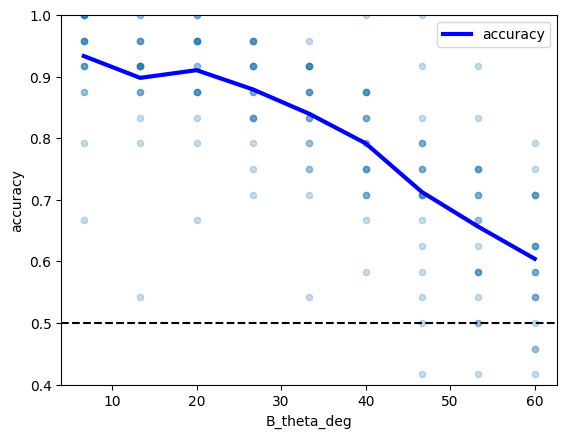

In [94]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
results.plot.scatter(x='B_theta_deg', y='accuracy', ax=ax, alpha=.25)
mean_accuracy_per_B_theta = results.groupby('B_theta_deg')['accuracy'].mean().reset_index()
mean_accuracy_per_B_theta.plot(x='B_theta_deg', y='accuracy', ax=ax, color='b', lw=3)
ax.axhline(.5, color='k', linestyle='--')
ax.set_ylim(.4, 1)
mean_accuracy_per_B_theta

In [95]:
from scipy import stats
stats.ttest_1samp?

Signature:
stats.ttest_1samp(
    a,
    popmean,
    axis=0,
    nan_policy='propagate',
    alternative='two-sided',
    *,
    keepdims=False,
)
Docstring:
Calculate the T-test for the mean of ONE group of scores.

This is a test for the null hypothesis that the expected value
(mean) of a sample of independent observations `a` is equal to the given
population mean, `popmean`.

Parameters
----------
a : array_like
    Sample observations.
popmean : float or array_like
    Expected value in null hypothesis. If array_like, then its length along
    `axis` must equal 1, and it must otherwise be broadcastable with `a`.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input

In [96]:
for B_theta in results['B_theta_deg'].unique():
    # print(B_theta, results[results['B_theta_deg'] == B_theta]['accuracy'])
    print(B_theta, stats.ttest_1samp(results[results['B_theta_deg'] == B_theta]['accuracy'], popmean=..5))    

6.666666668598186 TtestResult(statistic=23.133669546067836, pvalue=2.2246982462788737e-15, df=19)
13.333333331466793 TtestResult(statistic=18.17205106016396, pvalue=1.8050681285509589e-13, df=19)
20.00000000006498 TtestResult(statistic=22.54287591030422, pvalue=3.5775984389130695e-15, df=19)
26.66666666866316 TtestResult(statistic=23.332929638953015, pvalue=1.900172965383109e-15, df=19)
33.333333331531776 TtestResult(statistic=15.537723490503243, pvalue=2.9575179605579117e-12, df=19)
40.00000000012996 TtestResult(statistic=13.784048752090227, pvalue=2.411409064172135e-11, df=19)
46.66666666872814 TtestResult(statistic=6.998442414844536, pvalue=1.1507186268562462e-06, df=19)
53.333333331596755 TtestResult(statistic=5.7125815343204955, pvalue=1.661196175685863e-05, df=19)
60.00000000019494 TtestResult(statistic=4.505457279693736, pvalue=0.00024216713513486, df=19)
